# Synthetic dust polarization map

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Reading data (assuming that you've already downloaded the relevant data)

In [2]:
# add path to astro_tigress module
# this can also be done using PYTHONPATH environment variable
import sys
sys.path.insert(0,'../')

import astro_tigress
# Need to set the master directory where the data is stored
dir_master = "../data/"
# name of the simulation model
model_id = "R8_4pc" 
model = astro_tigress.Model(model_id,dir_master) #reading the model information

In [3]:
#load the MHD data set for the snapshot ivtk=300
model.load(300, dataset="MHD")

Let's convert the YT covering grid into numpy arrray with appropriate units. Magnetic fields are in microG. In the dust polarization map construction, only the ratio of different B components matters so that the units are not important for now. Also, I take transpose so that the array is in the original C-like ordering `(z,y,x)`

In [4]:
Temp = model.MHD.grid[('gas','temperature')].in_units("K").value.T
nH = model.MHD.grid[('gas','nH')].in_units("cm**-3").value.T
Bx = model.MHD.grid[('gas','magnetic_field_x')].in_units("uG").value.T
By = model.MHD.grid[('gas','magnetic_field_y')].in_units("uG").value.T
Bz = model.MHD.grid[('gas','magnetic_field_z')].in_units("uG").value.T

Retrieve cell-centered coordinates for later uses.

In [5]:
xcc = model.MHD.grid[("gas","x")][:,0,0].to('pc').value
ycc = model.MHD.grid[("gas","y")][0,:,0].to('pc').value
zcc = model.MHD.grid[("gas","z")][0,0,:].to('pc').value

Get cell size in pc and cm for convenience (note that the cell is cubic)

In [6]:
dx_pc = model.MHD.grid[("gas","dx")][0,0,0].to('pc').value
dx_cm = model.MHD.grid[("gas","dx")][0,0,0].to('cm').value

In [7]:
from astro_tigress.synthetic_dustpol import calc_IQU

In [8]:
I,Q,U = calc_IQU(nH,Bx,By,Bz,dx_pc,los='y')

## Projected column density and I

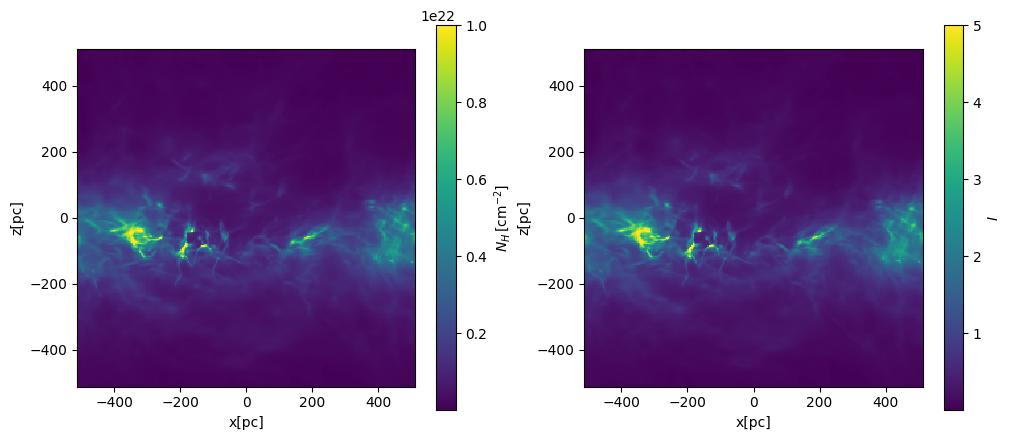

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
# integration along the y-axis (edge on view)
plt.sca(axes[0])
NH = nH.sum(axis=1)*dx_cm

plt.pcolormesh(xcc,zcc,NH,vmax=1.e22,shading='nearest')
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('z[pc]')
cbar = plt.colorbar(label=r'$N_H\,[{\rm cm^{-2}}]$')

plt.sca(axes[1])

plt.pcolormesh(xcc,zcc,I,vmax=5,shading='nearest')
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('z[pc]')
cbar = plt.colorbar(label=r'$I$')

## Polarization fraction, Q, and U maps

In [10]:
P = np.sqrt(Q**2+U**2)

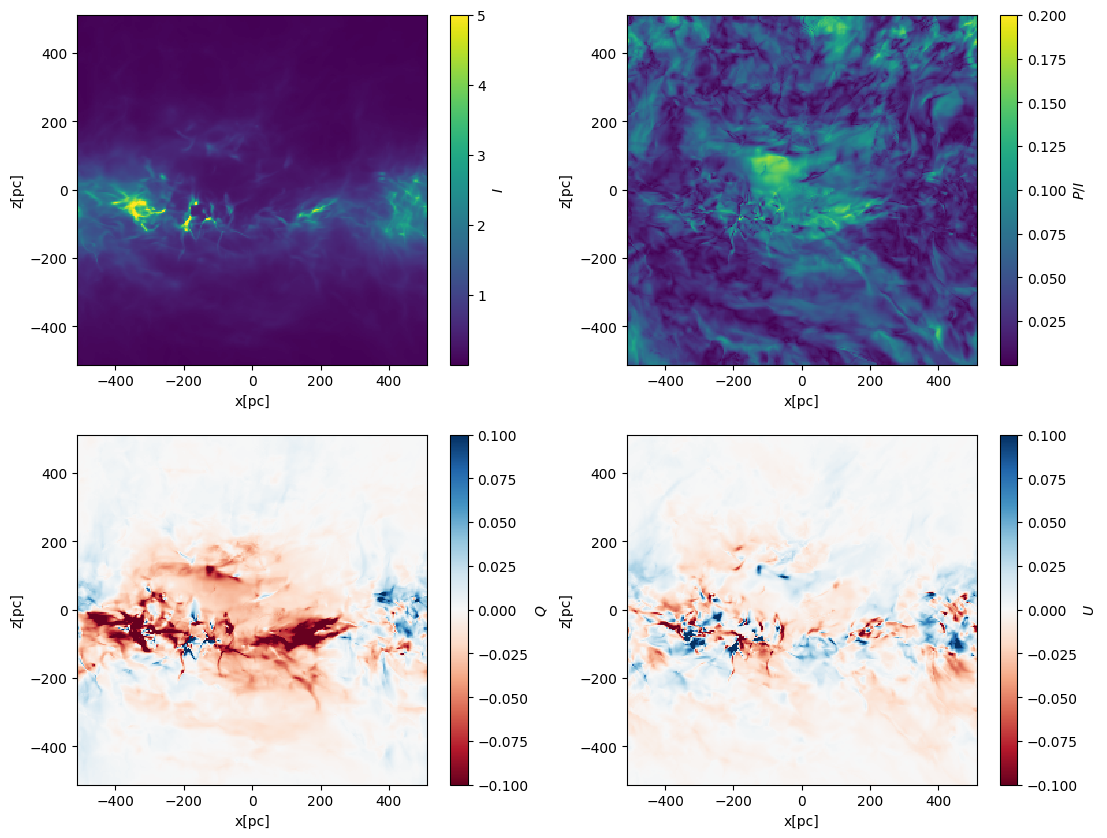

In [11]:
fig, axes = plt.subplots(2,2, figsize=(13,10))
axes = axes.flatten()
# integration along the y-axis (edge on view)
plt.sca(axes[0])
plt.pcolormesh(xcc,zcc,I,vmax=5,shading='nearest')
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('z[pc]')
cbar = plt.colorbar(label=r'$I$')
plt.sca(axes[1])
plt.pcolormesh(xcc,zcc,P/I,vmax=0.2,shading='nearest')
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('z[pc]')
cbar = plt.colorbar(label=r'$P/I$')

plt.sca(axes[2])
plt.pcolormesh(xcc,zcc,Q,vmin=-0.1,vmax=0.1,shading='nearest',cmap=plt.cm.RdBu)
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('z[pc]')
cbar = plt.colorbar(label=r'$Q$')
plt.sca(axes[3])
plt.pcolormesh(xcc,zcc,U,vmin=-0.1,vmax=0.1,shading='nearest',cmap=plt.cm.RdBu)
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('z[pc]')
cbar = plt.colorbar(label=r'$U$')